In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import iglob

In [3]:
from src.pipeline import get_columns

In [47]:
data = pd.read_csv('data/raw/LoanStats_securev1_2016Q1.csv', skiprows=[0], low_memory=False)


In [48]:
data['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Charged Off',
       'Late (16-30 days)', 'In Grace Period', 'Default'], dtype=object)

### Get data for all years

In [6]:
dfs = []

In [7]:
# Get all 
for f in iglob('data/raw/' + '*.csv'):
    temp_df = pd.read_csv(f, skiprows=[0], low_memory=False)
    dfs.append(temp_df)

In [8]:
# Get the columns that are consistent in all years

cols = set(dfs[0].columns)
for i in range(1,len(dfs)):
    column_difference = cols.difference(set(dfs[i].columns))
    for c in column_difference:
        cols.remove(c)
            

In [12]:
data = dfs[0][cols]
for i in range(1, len(dfs)):
    data = data.append(dfs[i][cols])

In [14]:
data.head()

,total_il_high_credit_limit,all_util,earliest_cr_line,installment,total_acc,sec_app_num_rev_accts,tot_coll_amt,mths_since_recent_bc_dlq,open_acc_6m,inq_last_12m,...,total_rec_prncp,mths_since_rcnt_il,sec_app_chargeoff_within_12_mths,pub_rec,collection_recovery_fee,chargeoff_within_12_mths,zip_code,mo_sin_rcnt_tl,num_rev_tl_bal_gt_0,policy_code
0,54912.0,46.0,Jan-96,324.23,23,NaN,671.0,NaN,1.0,1.0,...,478.34,1.0,NaN,0,0.0,0,974xx,1.0,4.0,1
1,18124.0,28.0,Apr-01,84.92,34,NaN,0.0,NaN,2.0,2.0,...,113.98,2.0,NaN,1,0.0,0,109xx,1.0,5.0,1
2,9000.0,64.0,Aug-05,276.49,9,NaN,0.0,NaN,1.0,3.0,...,283.37,4.0,NaN,0,0.0,0,180xx,4.0,6.0,1
3,14490.0,36.0,Oct-99,352.69,30,15.0,0.0,NaN,1.0,0.0,...,345.43,16.0,0.0,0,0.0,0,756xx,6.0,13.0,1
4,38424.0,58.0,Oct-05,406.04,27,NaN,0.0,52.0,3.0,1.0,...,335.37,2.0,NaN,0,0.0,0,284xx,2.0,2.0,1


In [15]:
data.to_csv('data/all_years.csv')

In [13]:
data.shape

(2854472, 126)

In [10]:
missing_cols = set()
for i in range(len(dfs)):
    for c in set(dfs[i].columns):
        if c not in cols:
            missing_cols.add(c)

### Exploration

In [13]:
columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [14]:
import pickle

In [16]:
with open('data/columns_in_all.pickle', 'wb') as handle:
    pickle.dump(columns, handle)

In [18]:
with open('data/columns_in_all.pickle', 'rb') as handle:
    cols = pickle.load(handle)

In [49]:
data = data[cols]

In [50]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog'],
      dtype='object', length=126)

In [51]:
data.iloc[:,10:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133887 entries, 0 to 133886
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   emp_title            124906 non-null  object 
 1   emp_length           124943 non-null  object 
 2   home_ownership       133887 non-null  object 
 3   annual_inc           133887 non-null  float64
 4   verification_status  133887 non-null  object 
 5   issue_d              133887 non-null  object 
 6   loan_status          133887 non-null  object 
 7   pymnt_plan           133887 non-null  object 
 8   url                  133887 non-null  object 
 9   desc                 10 non-null      object 
dtypes: float64(1), object(9)
memory usage: 10.2+ MB


In [36]:
# Useless columns:
col_drop = ['member_id', 'funded_amnt', 'emp_title', 'url']

# emp_title - may be usefull


col_leak = ['funded_amnt_inv', 'int_rate', 'grade', 'sub_grade', 'issue_d', 'pymnt_plan']

target = ['loan_status']

0

In [61]:
data.loc[:10,'desc']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
Name: desc, dtype: object

In [59]:
data['issue_d'].unique()

array(['Mar-16', 'Feb-16', 'Jan-16'], dtype=object)

In [62]:
data['desc'].isna().sum()

133877

In [63]:
len(data)

133887

In [53]:
data['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Charged Off',
       'Late (16-30 days)', 'In Grace Period', 'Default'], dtype=object)

<AxesSubplot:>

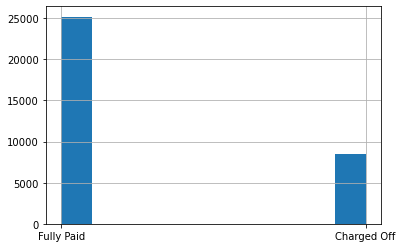

In [55]:
data['loan_status'][data['loan_status'].apply(lambda x: x in ['Fully Paid', 'Charged Off'])].hist()

In [56]:
data.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
id,1.000000,NaN,-0.039486,-0.039486,-0.039705,-0.032644,-0.024995,0.006478,-0.001504,0.014099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,-0.039486,NaN,1.000000,1.000000,0.999991,0.944055,0.303144,0.000296,-0.005336,0.114813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt,-0.039486,NaN,1.000000,1.000000,0.999991,0.944055,0.303144,0.000296,-0.005336,0.114813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,-0.039705,NaN,0.999991,0.999991,1.000000,0.943942,0.303205,0.000227,-0.005389,0.115038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sec_app_revol_util,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sec_app_num_rev_accts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sec_app_chargeoff_within_12_mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sec_app_collections_12_mths_ex_med,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
